# Capstone Project: Opening a Coffee Shop in New York City

## Acquiring New York City Neighborhood Data

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [3]:
page = requests.get("https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm")
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471"
5,Bronx,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Bronx,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,Brooklyn,Southwest Brooklyn,"11209, 11214, 11228"
9,Brooklyn,Borough Park,"11204, 11218, 11219, 11230"


In [5]:
zipDF = df
zipDF.head()

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471"


In [6]:
zipDF.shape

(42, 3)

## Acquiring Location Data

In [7]:
!pip install geocoder

     |████████████████████████████████| 98 kB 8.8 MB/s  eta 0:00:01


In [8]:
import geocoder

In [9]:
lats = []
longs = []

for postal_code in list(zipDF['Neighborhood']):
    # initialize your variable to None
    lat_lng_coords = None
    
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, New York City, New York'.format(postal_code))
        lat_lng_coords = g.latlng

    lats.append(lat_lng_coords[0])
    longs.append(lat_lng_coords[1])

print('Done!')

Done!


In [10]:
df_coords = zipDF
df_coords['Latitude'] = lats
df_coords['Longitude'] = longs
df_coords.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700


## Acquiring Crime Data

In [11]:
precinct_page = requests.get("https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page")
precinct_page

<Response [200]>

In [14]:
precinct_soup = BeautifulSoup(precinct_page.content, 'html.parser')
precinct_table = precinct_soup.find_all('table')
precinct_df = pd.read_html(str(precinct_table))[0]
precinct_df

,Precinct,Phone,Address
0,Manhattan,Manhattan,Manhattan
1,1st Precinct,212-334-0611,16 Ericsson Place
2,5th Precinct,212-334-0711,19 Elizabeth Street
3,6th Precinct,212-741-4811,233 West 10 Street
4,7th Precinct,212-477-7311,19 1/2 Pitt Street
...,...,...,...
77,Staten Island,Staten Island,Staten Island
78,120th Precinct,718-876-8500,78 Richmond Terrace
79,121st Precinct,718-697-8700,970 Richmond Avenue
80,122nd Precinct,718-667-2211,2320 Hylan Boulevard


In [15]:
precinct_df = precinct_df.drop(["Phone", "Address"], axis=1)
precinct_df

,Precinct
0,Manhattan
1,1st Precinct
2,5th Precinct
3,6th Precinct
4,7th Precinct
...,...
77,Staten Island
78,120th Precinct
79,121st Precinct
80,122nd Precinct


In [16]:
boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

In [17]:
for index, row in precinct_df.iterrows():
    row["Precinct"] = row["Precinct"].replace("Midtown South Precinct", "14")
    row["Precinct"] = row["Precinct"].replace("Midtown North Precinct", "18")
    row["Precinct"] = row["Precinct"].replace("Central Park Precinct", "22")
    row["Precinct"] = row["Precinct"].replace("st Precinct", "")
    row["Precinct"] = row["Precinct"].replace("nd Precinct", "")
    row["Precinct"] = row["Precinct"].replace("rd Precinct", "")
    row["Precinct"] = row["Precinct"].replace("th Precinct", "")
    
precinct_df

,Precinct
0,Manhattan
1,1
2,5
3,6
4,7
...,...
77,Staten Island
78,120
79,121
80,122


In [18]:
borough = ""
data = []
precincts = []
for index, row in precinct_df.iterrows():
    if row["Precinct"] in boroughs:
        if borough != "":
            data.append([borough, precincts])
            precincts = []
        borough = row["Precinct"]
    else:
        precincts.append(row["Precinct"])

data.append([borough, precincts])
data

[['Manhattan',
  ['1',
   '5',
   '6',
   '7',
   '9',
   '10',
   '13',
   '14',
   '17',
   '18',
   '19',
   '20',
   '22',
   '23',
   '24',
   '25',
   '26',
   '28',
   '30',
   '32',
   '33',
   '34']],
 ['Bronx',
  ['40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '52']],
 ['Brooklyn',
  ['60',
   '61',
   '62',
   '63',
   '66',
   '67',
   '68',
   '69',
   '70',
   '71',
   '72',
   '73',
   '75',
   '76',
   '77',
   '78',
   '79',
   '81',
   '83',
   '84',
   '88',
   '90',
   '94']],
 ['Queens',
  ['100',
   '101',
   '102',
   '103',
   '104',
   '105',
   '106',
   '107',
   '108',
   '109',
   '110',
   '111',
   '112',
   '113',
   '114',
   '115']],
 ['Staten Island', ['120', '121', '122', '123']]]

In [19]:
precinctDF = pd.DataFrame(data, columns = ["Borough", "Precincts"])
precinctDF.head()

,Borough,Precincts
0,Manhattan,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22..."
1,Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"
2,Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7..."
3,Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ..."
4,Staten Island,"[120, 121, 122, 123]"


In [20]:
nyc_precinct = pd.merge(df_coords, precinctDF, on='Borough')
nyc_precinct.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]"


### The following data for the 7 major crimes in NYC for 2019 is from: https://www1.nyc.gov/assets/nypd/downloads/pdf/analysis_and_planning/historical-crime-data/seven-major-felony-offenses-by-precinct-2000-2019.pdf

In [21]:
crime_page = requests.get("https://github.com/pross527873/Coursera_Capstone/blob/master/NYC_2019_Crime_Data.csv")
crime_page

<Response [200]>

In [22]:
crime_soup = BeautifulSoup(crime_page.content, 'html.parser')
crime_table = crime_soup.find_all('table')
crime_df = pd.read_html(str(crime_table))[0]
crime_df.head()

,Unnamed: 0,Precinct,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,NaN,1,1,15,78,98,131,1044,19
1,NaN,5,6,14,91,163,101,585,16
2,NaN,6,0,6,143,135,137,1072,41
3,NaN,7,0,7,149,187,94,507,18
4,NaN,9,3,15,119,173,123,764,37


In [23]:
crime_df = crime_df.drop(["Unnamed: 0"], axis=1)
crime_df.head()

,Precinct,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,1,1,15,78,98,131,1044,19
1,5,6,14,91,163,101,585,16
2,6,0,6,143,135,137,1072,41
3,7,0,7,149,187,94,507,18
4,9,3,15,119,173,123,764,37


In [24]:
nyc_precinct['Murder & Non Negligent Manslaughter'] = 0
nyc_precinct['Rape'] = 0
nyc_precinct['Robbery'] = 0
nyc_precinct['Felony Assault'] = 0
nyc_precinct['Burglary'] = 0
nyc_precinct['Grand Larceny'] = 0
nyc_precinct['Grand Larceny of Motor Vehicle'] = 0
nyc_precinct.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0,0,0,0,0,0,0
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0,0,0,0,0,0,0
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0,0,0,0,0,0,0
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0,0,0,0,0,0,0
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0,0,0,0,0,0,0


In [25]:
nyc_crime = nyc_precinct

for index, row in crime_df.iterrows():
    for index2, row2 in nyc_crime.iterrows():
        if str(row['Precinct']) in row2['Precincts']:
            nyc_crime.loc[index2, 'Murder & Non Negligent Manslaughter'] = row2['Murder & Non Negligent Manslaughter'] + row['Murder & Non Negligent Manslaughter']
            nyc_crime.loc[index2, 'Rape'] = row2['Rape'] + row['Rape']
            nyc_crime.loc[index2, 'Robbery'] = row2['Robbery'] + row['Robbery']
            nyc_crime.loc[index2, 'Felony Assault'] = row2['Felony Assault'] + row['Felony Assault']
            nyc_crime.loc[index2, 'Burglary'] = row2['Burglary'] + row['Burglary']
            nyc_crime.loc[index2, 'Grand Larceny'] = row2['Grand Larceny'] + row['Grand Larceny']
            nyc_crime.loc[index2, 'Grand Larceny of Motor Vehicle'] = row2['Grand Larceny of Motor Vehicle'] + row['Grand Larceny of Motor Vehicle']
            
nyc_crime.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257


In [26]:
nyc_neighborhoods = nyc_crime
nyc_neighborhoods.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257


## Neighborhood Clustering

In [27]:
!pip install folium

     |████████████████████████████████| 93 kB 3.4 MB/s  eta 0:00:01


In [28]:
!pip install geopy

In [29]:
import folium
from geopy.geocoders import Nominatim

In [30]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [31]:
# create map of New York City using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nyc_neighborhoods['Latitude'], nyc_neighborhoods['Longitude'], nyc_neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

In [32]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

## Examine One Neighborhood

In [33]:
df_nyc = nyc_neighborhoods
df_nyc.loc[0, 'Neighborhood']

'Central Bronx'

In [34]:
neighborhood_latitude = df_nyc.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_nyc.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_nyc.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central Bronx are 40.82466885112687, -73.80911130150804.


In [35]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe2bf31823a4a58120d4968'},
 'response': {'headerLocation': 'Edgewater Park',
  'headerFullLocation': 'Edgewater Park, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 40.829168855626875,
    'lng': -73.80317563158076},
   'sw': {'lat': 40.82016884662687, 'lng': -73.81504697143532}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c12f09877cea5934c12ce60',
       'name': 'Bicentennial Veterans Memorial park',
       'location': {'address': 'Throggs Neck Expressway',
        'crossStreet': 'Weir Creek',
        'lat': 40.82424235914897,
        'lng': -73.81420155901135,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.82424235914897,
          'lng': -7

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
import json
from pandas.io.json import json_normalize

In [39]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Bicentennial Veterans Memorial park,Park,40.824242,-73.814202
1,Envy Nails (Cindy),Spa,40.824917,-73.808418
2,Land of Cake Believe,Cupcake Shop,40.823093,-73.811470
3,Ruane's Deli,Deli / Bodega,40.822433,-73.810703
4,Big Oak Beach,Beach,40.822779,-73.806561
5,MTA MaBSTOA Bus Bx8 / BxM9 in Edgewater Park (...,Bus Station,40.821896,-73.812118


In [40]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


## Explore All Neighborhoods in NYC

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [42]:
nyc_venues = getNearbyVenues(names=df_nyc['Neighborhood'],
                                   latitudes=df_nyc['Latitude'],
                                   longitudes=df_nyc['Longitude']
                                  )

Central Bronx
Bronx Park and Fordham
High Bridge and Morrisania
Hunts Point and Mott Haven
Kingsbridge and Riverdale
Northeast Bronx
Southeast Bronx
Central Brooklyn
Southwest Brooklyn
Borough Park
Canarsie and Flatlands
Southern Brooklyn
Northwest Brooklyn
Flatbush
East New York and New Lots
Greenpoint
Sunset Park
Bushwick and Williamsburg
Central Harlem
Chelsea and Clinton
East Harlem
Gramercy Park and Murray Hill
Greenwich Village and Soho
Lower Manhattan
Lower East Side
Upper East Side
Upper West Side
Inwood and Washington Heights
Northeast Queens
North Queens
Central Queens
Jamaica
Northwest Queens
West Central Queens
Rockaways
Southeast Queens
Southwest Queens
West Queens
Port Richmond
South Shore
Stapleton and St. George
Mid-Island


In [43]:
print(nyc_venues.shape)
nyc_venues.head()

(1794, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Bronx,40.824669,-73.809111,Bicentennial Veterans Memorial park,40.824242,-73.814202,Park
1,Central Bronx,40.824669,-73.809111,Envy Nails (Cindy),40.824917,-73.808418,Spa
2,Central Bronx,40.824669,-73.809111,Land of Cake Believe,40.823093,-73.811470,Cupcake Shop
3,Central Bronx,40.824669,-73.809111,Ruane's Deli,40.822433,-73.810703,Deli / Bodega
4,Central Bronx,40.824669,-73.809111,Big Oak Beach,40.822779,-73.806561,Beach


In [44]:
nyc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Borough Park,20,20,20,20,20,20
Bronx Park and Fordham,63,63,63,63,63,63
Bushwick and Williamsburg,53,53,53,53,53,53
Canarsie and Flatlands,36,36,36,36,36,36
Central Bronx,6,6,6,6,6,6
Central Brooklyn,11,11,11,11,11,11
Central Harlem,38,38,38,38,38,38
Central Queens,4,4,4,4,4,4
Chelsea and Clinton,100,100,100,100,100,100


In [45]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
nyc_onehot.shape

(1794, 256)

In [47]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Borough Park,0.000000,0.00,0.000000,0.000000,0.050000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bronx Park and Fordham,0.015873,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.015873,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.000000
2,Bushwick and Williamsburg,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.018868,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Canarsie and Flatlands,0.000000,0.00,0.000000,0.000000,0.027778,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bronx,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Central Brooklyn,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Harlem,0.000000,0.00,0.078947,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.026316,0.000000,0.000000
7,Central Queens,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Chelsea and Clinton,0.000000,0.00,0.000000,0.000000,0.010000,0.00000,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.00,0.060000,0.020000,0.000000,0.000000,0.010000
9,East Harlem,0.000000,0.00,0.013333,0.000000,0.000000,0.00000,0.00,0.000000,0.00,...,0.013333,0.000000,0.00,0.000000,0.00,0.013333,0.013333,0.000000,0.000000,0.000000


In [48]:
nyc_grouped.shape

(41, 256)

## Neighborhood and Top 10 Most Common Venues

In [49]:
num_top_venues = 10

for hood in nyc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Borough Park----
                  venue  freq
0            Restaurant  0.15
1           Pizza Place  0.10
2  Fast Food Restaurant  0.10
3              Pharmacy  0.10
4                  Bank  0.10
5                 Hotel  0.05
6         Deli / Bodega  0.05
7           Coffee Shop  0.05
8           Candy Store  0.05
9                  Café  0.05


----Bronx Park and Fordham----
                  venue  freq
0            Shoe Store  0.08
1         Deli / Bodega  0.08
2  Fast Food Restaurant  0.05
3           Pizza Place  0.05
4        Clothing Store  0.05
5           Coffee Shop  0.05
6        Sandwich Place  0.05
7  Gym / Fitness Center  0.03
8              Pharmacy  0.03
9       Supplement Shop  0.03


----Bushwick and Williamsburg----
                     venue  freq
0                      Bar  0.11
1              Coffee Shop  0.11
2            Deli / Bodega  0.04
3                  Brewery  0.04
4       Mexican Restaurant  0.04
5             Cocktail Bar  0.04
6       Italian Res

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Borough Park,Restaurant,Pharmacy,Bank,Pizza Place,Fast Food Restaurant,Deli / Bodega,Department Store,Hotel,American Restaurant,Candy Store
1,Bronx Park and Fordham,Shoe Store,Deli / Bodega,Coffee Shop,Clothing Store,Fast Food Restaurant,Sandwich Place,Pizza Place,Miscellaneous Shop,Bank,Gym / Fitness Center
2,Bushwick and Williamsburg,Coffee Shop,Bar,Italian Restaurant,Deli / Bodega,Brewery,Cocktail Bar,Restaurant,Mexican Restaurant,Convenience Store,Sporting Goods Shop
3,Canarsie and Flatlands,Italian Restaurant,Bar,Pizza Place,Bagel Shop,Bakery,Shoe Store,Sandwich Place,Chinese Restaurant,Supermarket,Clothing Store
4,Central Bronx,Cupcake Shop,Bus Station,Deli / Bodega,Spa,Park,Beach,Eye Doctor,Empanada Restaurant,English Restaurant,Event Space


## Cluster Neighborhoods without Crime Data

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Determine number of clusters

In [53]:
Sum_of_squared_distances = []

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nyc_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

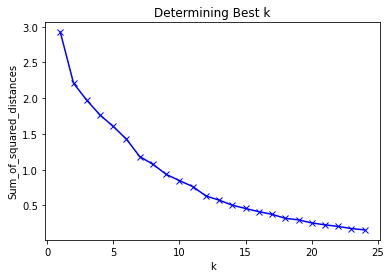

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Determining Best k')
plt.show()

In [55]:
kclusters = 9

In [56]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

In [57]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 1, 1, 0, 1, 8, 1, 1], dtype=int32)

In [58]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(["Cluster Labels"], axis=1)

KeyError: "['Cluster Labels'] not found in axis"

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_nyc_without_crime = df_nyc
df_nyc_without_crime = df_nyc_without_crime.drop(["Murder & Non Negligent Manslaughter", "Rape", "Robbery", "Felony Assault", "Burglary", "Grand Larceny", "Grand Larceny of Motor Vehicle"], axis=1)

nyc_merged = df_nyc_without_crime

# merge nyc_grouped with df_nyc to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",1.0,Cupcake Shop,Bus Station,Deli / Bodega,Spa,Park,Beach,Eye Doctor,Empanada Restaurant,English Restaurant,Event Space
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Shoe Store,Deli / Bodega,Coffee Shop,Clothing Store,Fast Food Restaurant,Sandwich Place,Pizza Place,Miscellaneous Shop,Bank,Gym / Fitness Center
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",6.0,Food Truck,Historic Site,Cosmetics Shop,Park,Bridge,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Pizza Place,Mexican Restaurant,Gas Station,Donut Shop,Deli / Bodega,Coffee Shop,Grocery Store,Chinese Restaurant,Clothing Store,Beer Garden
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Latin American Restaurant,Donut Shop,Supermarket,Pharmacy,Fried Chicken Joint,Bar


In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if(math.isnan(cluster)!=True):
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [62]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx Park and Fordham,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Shoe Store,Deli / Bodega,Coffee Shop,Clothing Store,Fast Food Restaurant,Sandwich Place,Pizza Place,Miscellaneous Shop,Bank,Gym / Fitness Center
3,Hunts Point and Mott Haven,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Pizza Place,Mexican Restaurant,Gas Station,Donut Shop,Deli / Bodega,Coffee Shop,Grocery Store,Chinese Restaurant,Clothing Store,Beer Garden
4,Kingsbridge and Riverdale,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",0.0,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Latin American Restaurant,Donut Shop,Supermarket,Pharmacy,Fried Chicken Joint,Bar
7,Central Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",0.0,Deli / Bodega,Pub,Restaurant,Shoe Store,Laundromat,Discount Store,Athletics & Sports,Bar,Mexican Restaurant,Pizza Place
9,Borough Park,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",0.0,Restaurant,Pharmacy,Bank,Pizza Place,Fast Food Restaurant,Deli / Bodega,Department Store,Hotel,American Restaurant,Candy Store
13,Flatbush,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",0.0,Caribbean Restaurant,Pizza Place,Deli / Bodega,Fried Chicken Joint,Fast Food Restaurant,Grocery Store,Mobile Phone Shop,Liquor Store,Discount Store,Donut Shop
16,Sunset Park,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",0.0,Pizza Place,Bank,Bakery,Latin American Restaurant,Fried Chicken Joint,Mexican Restaurant,Gym,Pharmacy,Mobile Phone Shop,Breakfast Spot
31,Jamaica,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",0.0,Deli / Bodega,Latin American Restaurant,Pizza Place,Restaurant,Fried Chicken Joint,Pharmacy,Park,Bank,Sandwich Place,Supermarket
40,Stapleton and St. George,"[120, 121, 122, 123]",0.0,Pizza Place,Bar,Discount Store,Coffee Shop,Bank,Sandwich Place,Fast Food Restaurant,Baseball Field,Beer Bar,Sri Lankan Restaurant


In [63]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",1.0,Cupcake Shop,Bus Station,Deli / Bodega,Spa,Park,Beach,Eye Doctor,Empanada Restaurant,English Restaurant,Event Space
8,Southwest Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",1.0,Grocery Store,Pizza Place,Café,Bar,Southern / Soul Food Restaurant,Sandwich Place,Seafood Restaurant,Liquor Store,Bank,Coffee Shop
10,Canarsie and Flatlands,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",1.0,Italian Restaurant,Bar,Pizza Place,Bagel Shop,Bakery,Shoe Store,Sandwich Place,Chinese Restaurant,Supermarket,Clothing Store
12,Northwest Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",1.0,Grocery Store,Pizza Place,Café,Bar,Southern / Soul Food Restaurant,Sandwich Place,Seafood Restaurant,Liquor Store,Bank,Coffee Shop
15,Greenpoint,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",1.0,Yoga Studio,Thrift / Vintage Store,Pizza Place,Polish Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Liquor Store,Donut Shop
17,Bushwick and Williamsburg,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",1.0,Coffee Shop,Bar,Italian Restaurant,Deli / Bodega,Brewery,Cocktail Bar,Restaurant,Mexican Restaurant,Convenience Store,Sporting Goods Shop
18,Central Harlem,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",1.0,Park,African Restaurant,Playground,Scenic Lookout,Plaza,Mexican Restaurant,Coffee Shop,Bridge,Café,Pizza Place
19,Chelsea and Clinton,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",1.0,Theater,Coffee Shop,Wine Bar,Mexican Restaurant,Bar,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Ramen Restaurant
20,East Harlem,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",1.0,Mexican Restaurant,Pizza Place,Cosmetics Shop,Spanish Restaurant,Bakery,Pharmacy,Italian Restaurant,Burger Joint,Grocery Store,Deli / Bodega
21,Gramercy Park and Murray Hill,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",1.0,New American Restaurant,American Restaurant,Coffee Shop,Café,Italian Restaurant,Bar,Hotel,Mexican Restaurant,Spa,Park


In [64]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,West Central Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",2.0,Harbor / Marina,Park,Pool,Yoga Studio,Event Space,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Eye Doctor
37,West Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",2.0,Harbor / Marina,Park,Pool,Yoga Studio,Event Space,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Eye Doctor


In [65]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Northeast Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",3.0,Caribbean Restaurant,Pizza Place,Salon / Barbershop,Pharmacy,Shoe Store,Grocery Store,Discount Store,Restaurant,Smoke Shop,Spa
6,Southeast Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",3.0,Caribbean Restaurant,Pizza Place,Salon / Barbershop,Pharmacy,Shoe Store,Grocery Store,Discount Store,Restaurant,Smoke Shop,Spa


In [66]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,North Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",4.0,Food,Rest Area,Tennis Court,Vegetarian / Vegan Restaurant,Rock Club,Fast Food Restaurant,Farmers Market,Filipino Restaurant,Eye Doctor,Dry Cleaner


In [67]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Southern Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",5.0,Trail,Intersection,Deli / Bodega,Metro Station,Yoga Studio,Farmers Market,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor


In [68]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,High Bridge and Morrisania,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",6.0,Food Truck,Historic Site,Cosmetics Shop,Park,Bridge,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant


In [69]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Northeast Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",7.0,Bakery,Donut Shop,Chinese Restaurant,Discount Store,Pizza Place,Caribbean Restaurant,Tennis Court,Gastropub,Rental Car Location,North Indian Restaurant
32,Northwest Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",7.0,Bakery,Donut Shop,Chinese Restaurant,Discount Store,Pizza Place,Caribbean Restaurant,Tennis Court,Gastropub,Rental Car Location,North Indian Restaurant
35,Southeast Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",7.0,Bakery,Donut Shop,Chinese Restaurant,Discount Store,Pizza Place,Caribbean Restaurant,Tennis Court,Gastropub,Rental Car Location,North Indian Restaurant
36,Southwest Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",7.0,Bakery,Donut Shop,Chinese Restaurant,Discount Store,Pizza Place,Caribbean Restaurant,Tennis Court,Gastropub,Rental Car Location,North Indian Restaurant
38,Port Richmond,"[120, 121, 122, 123]",7.0,Pizza Place,Playground,Bar,Donut Shop,Discount Store,Beer Store,Martial Arts School,Rental Car Location,Farmers Market,Fast Food Restaurant


In [70]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 8, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood,Precincts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Central Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",8.0,Caribbean Restaurant,Café,Bank,Deli / Bodega,Farmers Market,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant


## Clustering Neighborhoods with Crime Data

In [80]:
Sum_of_squared_distances_with_crime = []

nyc_neighborhoods_crime = nyc_neighborhoods[['Neighborhood', 'Murder & Non Negligent Manslaughter', "Rape", 'Robbery', 'Felony Assault', 'Burglary', 'Grand Larceny', 'Grand Larceny of Motor Vehicle']].copy()

# merge nyc_grouped with nyc_neighborhoods to add crime data for each neighborhood
nyc_merged_with_crime = nyc_grouped.join(nyc_neighborhoods_crime.set_index('Neighborhood'), on='Neighborhood')
nyc_merged_with_crime.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Wings Joint,Women's Store,Yoga Studio,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle
0,Borough Park,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,100,561,4024,6049,3475,11346,1774
1,Bronx Park and Fordham,0.015873,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.015873,0.0,84,396,3531,5748,2004,6373,1257
2,Bushwick and Williamsburg,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.018868,0.0,...,0.0,0.000000,0.0,100,561,4024,6049,3475,11346,1774
3,Canarsie and Flatlands,0.000000,0.0,0.0,0.0,0.027778,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,100,561,4024,6049,3475,11346,1774
4,Central Bronx,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,84,396,3531,5748,2004,6373,1257


In [83]:
nyc_grouped_clustering_with_crime = nyc_merged_with_crime.drop('Neighborhood', 1)

K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nyc_grouped_clustering_with_crime)
    Sum_of_squared_distances_with_crime.append(km.inertia_)

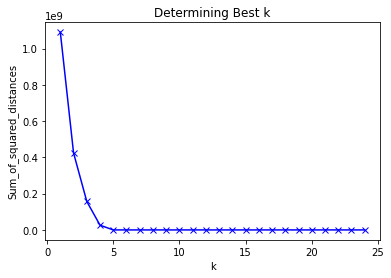

In [84]:
plt.plot(K, Sum_of_squared_distances_with_crime, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Determining Best k')
plt.show()

In [85]:
kclusters_with_crime = 4

In [86]:
# run k-means clustering
kmeans_with_crime = KMeans(n_clusters=kclusters_with_crime, random_state=0).fit(nyc_grouped_clustering_with_crime)

In [87]:
# check cluster labels generated for each row in the dataframe
kmeans_with_crime.labels_[0:10]

array([3, 1, 3, 3, 1, 3, 2, 1, 2, 2], dtype=int32)

In [88]:
neighborhoods_venues_sorted_with_crime = neighborhoods_venues_sorted.drop(["Cluster Labels"], axis=1)

# add clustering labels
neighborhoods_venues_sorted_with_crime.insert(0, 'Cluster Labels', kmeans_with_crime.labels_)

df_nyc_with_crime = df_nyc

# merge neighborhoods_venues_sorted_with_crime with df_nyc_with_crime to add latitude/longitude for each neighborhood
df_nyc_with_crime = df_nyc_with_crime.join(neighborhoods_venues_sorted_with_crime.set_index('Neighborhood'), on='Neighborhood')

df_nyc_with_crime.head()

,Borough,Neighborhood,ZIP Codes,Latitude,Longitude,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Central Bronx,"10453, 10457, 10460",40.824669,-73.809111,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,...,Cupcake Shop,Bus Station,Deli / Bodega,Spa,Park,Beach,Eye Doctor,Empanada Restaurant,English Restaurant,Event Space
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468",40.860100,-73.891425,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,...,Shoe Store,Deli / Bodega,Coffee Shop,Clothing Store,Fast Food Restaurant,Sandwich Place,Pizza Place,Miscellaneous Shop,Bank,Gym / Fitness Center
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456",40.842350,-73.930894,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,...,Food Truck,Historic Site,Cosmetics Shop,Park,Bridge,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",40.808990,-73.922950,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,...,Pizza Place,Mexican Restaurant,Gas Station,Donut Shop,Deli / Bodega,Coffee Shop,Grocery Store,Chinese Restaurant,Clothing Store,Beer Garden
4,Bronx,Kingsbridge and Riverdale,"10463, 10471",40.882201,-73.904700,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,...,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Latin American Restaurant,Donut Shop,Supermarket,Pharmacy,Fried Chicken Joint,Bar


In [89]:
# create map
map_clusters_with_crime = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_with_crime)
ys = [i + x + (i*x)**2 for i in range(kclusters_with_crime)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_nyc_with_crime['Latitude'], df_nyc_with_crime['Longitude'], df_nyc_with_crime['Neighborhood'], df_nyc_with_crime['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if(math.isnan(cluster)!=True):
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters_with_crime)
       
map_clusters_with_crime

## Examine Clusters with Crime

In [90]:
df_nyc_with_crime.loc[df_nyc_with_crime['Cluster Labels'] == 0, df_nyc_with_crime.columns[[1] + list(range(5, df_nyc_with_crime.shape[1]))]]

,Neighborhood,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Port Richmond,"[120, 121, 122, 123]",14,54,227,619,281,1046,178,0.0,Pizza Place,Playground,Bar,Donut Shop,Discount Store,Beer Store,Martial Arts School,Rental Car Location,Farmers Market,Fast Food Restaurant
39,South Shore,"[120, 121, 122, 123]",14,54,227,619,281,1046,178,0.0,Skating Rink,Café,Chinese Restaurant,Coffee Shop,French Restaurant,Skate Park,Mexican Restaurant,Other Great Outdoors,Cantonese Restaurant,Malay Restaurant
40,Stapleton and St. George,"[120, 121, 122, 123]",14,54,227,619,281,1046,178,0.0,Pizza Place,Bar,Discount Store,Coffee Shop,Bank,Sandwich Place,Fast Food Restaurant,Baseball Field,Beer Bar,Sri Lankan Restaurant
41,Mid-Island,"[120, 121, 122, 123]",14,54,227,619,281,1046,178,0.0,Harbor / Marina,Thrift / Vintage Store,Deli / Bodega,Seafood Restaurant,Spanish Restaurant,French Restaurant,Café,Boat or Ferry,Liquor Store,Baseball Field


In [91]:
df_nyc_with_crime.loc[df_nyc_with_crime['Cluster Labels'] == 1, df_nyc_with_crime.columns[[1] + list(range(5, df_nyc_with_crime.shape[1]))]]

,Neighborhood,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Cupcake Shop,Bus Station,Deli / Bodega,Spa,Park,Beach,Eye Doctor,Empanada Restaurant,English Restaurant,Event Space
1,Bronx Park and Fordham,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Shoe Store,Deli / Bodega,Coffee Shop,Clothing Store,Fast Food Restaurant,Sandwich Place,Pizza Place,Miscellaneous Shop,Bank,Gym / Fitness Center
2,High Bridge and Morrisania,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Food Truck,Historic Site,Cosmetics Shop,Park,Bridge,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant
3,Hunts Point and Mott Haven,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Pizza Place,Mexican Restaurant,Gas Station,Donut Shop,Deli / Bodega,Coffee Shop,Grocery Store,Chinese Restaurant,Clothing Store,Beer Garden
4,Kingsbridge and Riverdale,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Latin American Restaurant,Donut Shop,Supermarket,Pharmacy,Fried Chicken Joint,Bar
5,Northeast Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Caribbean Restaurant,Pizza Place,Salon / Barbershop,Pharmacy,Shoe Store,Grocery Store,Discount Store,Restaurant,Smoke Shop,Spa
6,Southeast Bronx,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52]",84,396,3531,5748,2004,6373,1257,1.0,Caribbean Restaurant,Pizza Place,Salon / Barbershop,Pharmacy,Shoe Store,Grocery Store,Discount Store,Restaurant,Smoke Shop,Spa
28,Northeast Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",69,419,2484,4166,2425,7942,1544,1.0,Bakery,Donut Shop,Chinese Restaurant,Discount Store,Pizza Place,Caribbean Restaurant,Tennis Court,Gastropub,Rental Car Location,North Indian Restaurant
29,North Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",69,419,2484,4166,2425,7942,1544,1.0,Food,Rest Area,Tennis Court,Vegetarian / Vegan Restaurant,Rock Club,Fast Food Restaurant,Farmers Market,Filipino Restaurant,Eye Doctor,Dry Cleaner
30,Central Queens,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",69,419,2484,4166,2425,7942,1544,1.0,Caribbean Restaurant,Café,Bank,Deli / Bodega,Farmers Market,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor,Fast Food Restaurant


In [92]:
df_nyc_with_crime.loc[df_nyc_with_crime['Cluster Labels'] == 2, df_nyc_with_crime.columns[[1] + list(range(5, df_nyc_with_crime.shape[1]))]]

,Neighborhood,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Harlem,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Park,African Restaurant,Playground,Scenic Lookout,Plaza,Mexican Restaurant,Coffee Shop,Bridge,Café,Pizza Place
19,Chelsea and Clinton,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Theater,Coffee Shop,Wine Bar,Mexican Restaurant,Bar,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Ramen Restaurant
20,East Harlem,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Mexican Restaurant,Pizza Place,Cosmetics Shop,Spanish Restaurant,Bakery,Pharmacy,Italian Restaurant,Burger Joint,Grocery Store,Deli / Bodega
21,Gramercy Park and Murray Hill,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,New American Restaurant,American Restaurant,Coffee Shop,Café,Italian Restaurant,Bar,Hotel,Mexican Restaurant,Spa,Park
22,Greenwich Village and Soho,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Italian Restaurant,Pizza Place,Sushi Restaurant,American Restaurant,Coffee Shop,Sandwich Place,Japanese Restaurant,Gym,Dessert Shop,Mediterranean Restaurant
23,Lower Manhattan,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Bar,Ice Cream Shop,Café,Mexican Restaurant,Coffee Shop,Asian Restaurant,Wine Bar,Sandwich Place,Speakeasy,Rock Club
24,Lower East Side,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Bar,Bakery,Coffee Shop,Chinese Restaurant,Art Gallery,Japanese Restaurant,Mexican Restaurant,Food Court,Gym / Fitness Center,Speakeasy
25,Upper East Side,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Italian Restaurant,Sushi Restaurant,Coffee Shop,Burger Joint,Gym / Fitness Center,Café,American Restaurant,Cocktail Bar,Bar,Mexican Restaurant
26,Upper West Side,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Grocery Store,Italian Restaurant,Pizza Place,Café,Bakery,Theater,Japanese Restaurant,Clothing Store,Pet Store,Diner
27,Inwood and Washington Heights,"[1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 22...",52,324,3104,3914,2498,16542,669,2.0,Pizza Place,Thai Restaurant,Latin American Restaurant,Sandwich Place,Spanish Restaurant,Grocery Store,Spa,New American Restaurant,Mobile Phone Shop,Chinese Restaurant


In [93]:
df_nyc_with_crime.loc[df_nyc_with_crime['Cluster Labels'] == 3, df_nyc_with_crime.columns[[1] + list(range(5, df_nyc_with_crime.shape[1]))]]

,Neighborhood,Precincts,Murder & Non Negligent Manslaughter,Rape,Robbery,Felony Assault,Burglary,Grand Larceny,Grand Larceny of Motor Vehicle,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Central Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Deli / Bodega,Pub,Restaurant,Shoe Store,Laundromat,Discount Store,Athletics & Sports,Bar,Mexican Restaurant,Pizza Place
8,Southwest Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Grocery Store,Pizza Place,Café,Bar,Southern / Soul Food Restaurant,Sandwich Place,Seafood Restaurant,Liquor Store,Bank,Coffee Shop
9,Borough Park,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Restaurant,Pharmacy,Bank,Pizza Place,Fast Food Restaurant,Deli / Bodega,Department Store,Hotel,American Restaurant,Candy Store
10,Canarsie and Flatlands,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Italian Restaurant,Bar,Pizza Place,Bagel Shop,Bakery,Shoe Store,Sandwich Place,Chinese Restaurant,Supermarket,Clothing Store
11,Southern Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Trail,Intersection,Deli / Bodega,Metro Station,Yoga Studio,Farmers Market,Empanada Restaurant,English Restaurant,Event Space,Eye Doctor
12,Northwest Brooklyn,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Grocery Store,Pizza Place,Café,Bar,Southern / Soul Food Restaurant,Sandwich Place,Seafood Restaurant,Liquor Store,Bank,Coffee Shop
13,Flatbush,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Caribbean Restaurant,Pizza Place,Deli / Bodega,Fried Chicken Joint,Fast Food Restaurant,Grocery Store,Mobile Phone Shop,Liquor Store,Discount Store,Donut Shop
15,Greenpoint,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Yoga Studio,Thrift / Vintage Store,Pizza Place,Polish Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Liquor Store,Donut Shop
16,Sunset Park,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Pizza Place,Bank,Bakery,Latin American Restaurant,Fried Chicken Joint,Mexican Restaurant,Gym,Pharmacy,Mobile Phone Shop,Breakfast Spot
17,Bushwick and Williamsburg,"[60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 7...",100,561,4024,6049,3475,11346,1774,3.0,Coffee Shop,Bar,Italian Restaurant,Deli / Bodega,Brewery,Cocktail Bar,Restaurant,Mexican Restaurant,Convenience Store,Sporting Goods Shop
